In [19]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.cluster import KMeans

from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier

In [20]:
import pandas as pd
df=pd.read_csv('breast.csv')
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

#from sklearn.linear_model import LogisticRegression


In [5]:
kmeanModel = KMeans(n_clusters=4).fit(X)
cluster1=kmeanModel.labels_
    

In [21]:

print(df.head())


per=(Y.shape[0])*(10/100) #10% data will be mislabeled

k=random.sample(range(Y.shape[0]), int(per)) #list of index no. of mislabeled data
Y=np.array(Y)
for i in k:
    if Y[i-1]==2:
        Y[i-1]=4;
    else:
        Y[i-1]=2

   Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0                 2                 50                  12500             98   
1                 0                 13                   3250             28   
2                 1                 16                   4000             35   
3                 2                 20                   5000             45   
4                 1                 24                   6000             77   

   whether he/she donated blood in March 2007  
0                                           1  
1                                           1  
2                                           1  
3                                           1  
4                                           0  


In [5]:
# from sklearn.model_selection import train_test_split
# Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,random_state=132,test_size=0.3)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
clf1=LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=1)
clf2=SVC()
clf3=GaussianNB()
model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
model = model.fit(X, Y)
Ypred=model.predict(X)

accuracy=accuracy_score(Ypred,Y)
print(accuracy)

0.713903743315508


/home/balram/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/balram/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [8]:
X['c']=cluster1 #added cluster as a feature

In [9]:
model1=SVC().fit(X,Y)
Ypred1=model1.predict(X)

accuracy1=accuracy_score(Ypred1,Y)
print(accuracy1)

0.839572192513369


/home/balram/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [10]:
ind1=[]
for i in range(Y.shape[0]):
    if Ypred[i]!=Ypred1[i]:
        ind1.append(i)

In [11]:
set_k=set(k)
set_ind=set(ind1)
wq=set_k&set_ind
print(len(wq))
print(len(k))
print(len(ind1))

8
74
103


In [12]:
# applying the semi supervised learning method for the prediction

from sklearn.semi_supervised import LabelSpreading

label_prop_model = LabelSpreading()

labels=np.copy(Y)

labels[ind1] = -1

jh=label_prop_model.fit(X, Y)

pred_y=jh.predict(X)
print(accuracy_score(pred_y,Y))



0.893048128342246


In [13]:
ind2=[]
for i in range(Y.shape[0]):
    if Ypred[i]!=pred_y[i]:
        ind2.append(i)

In [14]:
set_k=set(k)
set_ind=set(ind2)
wq=set_k&set_ind
print(len(wq))
print(len(k))
print(len(ind2))

10
74
138


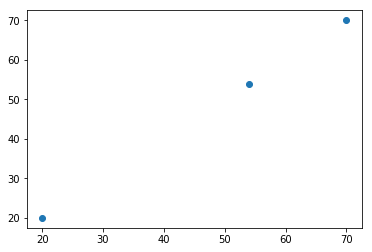

In [18]:
x=[20,54,70]
plt.scatter(x,x)